<center>
    <img src="https://i.ibb.co/wQg0qzq/Banner.png" width="900" alt="KCode Banner"  />
</center>
<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>




# Algoritmo de regressão nao linear

Se os dados mostrarem uma tendência curvilínea, a regressão linear não produzirá resultados muito precisos quando comparada a uma regressão não linear, pois a regressão linear pressupõe que os dados são lineares.
Neste notebook vamos aplicar um modelo não linear aos pontos de dados correspondentes ao PIB da China de 1960 a 2014.

### Importando bibliotecas necessárias

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

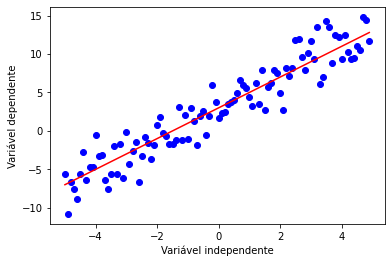

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Variável dependente')
plt.xlabel('Variável independente')
plt.show()

Embora a regressão linear possa fazer um ótimo trabalho na modelagem de alguns conjuntos de dados, ela não pode ser usada para todos os conjuntos de dados. Primeiro, lembre-se de como a regressão linear modela um conjunto de dados. Ele modela a relação linear entre uma variável dependente y e as variáveis independentes x. Tem uma equação simples, de grau 1, por exemplo y = $2x$ + 3.

Vamos dar uma olhada em um grafico de função cubica

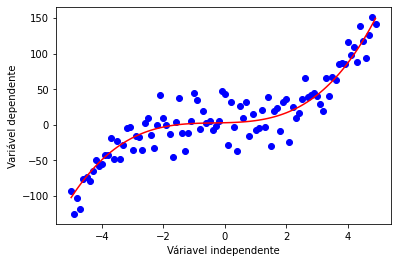

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

##Você pode ajustar a inclinação e a intercecção para verificar as mudanças no gráfico
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Variável dependente')
plt.xlabel('Váriavel independente')
plt.show()

Como você pode ver, esta função tem $x^3$ e $x^2$ como variáveis independentes. Além disso, o gráfico desta função não é uma linha reta sobre o plano 2D. Portanto, esta é uma função não linear.

Outros tipos de regressão não linear:

### Quadrática


$$ Y = X^2 $$

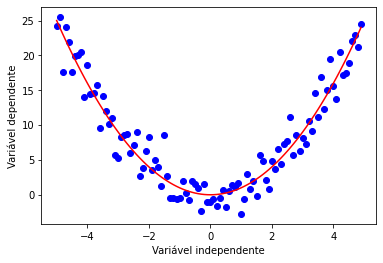

In [7]:
x = np.arange(-5.0, 5.0, 0.1)

##Você pode ajustar a inclinação e a interceptação para verificar as mudanças no gráfico

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Variável dependente')
plt.xlabel('Variável independente')
plt.show()

### Exponencial

Uma função exponencial com base c é definida por $$ Y = a + b c^X$$ onde b ≠0, c > 0 , c ≠1, ex é qualquer número real. A base, c, é constante e o expoente, x, é uma variável.


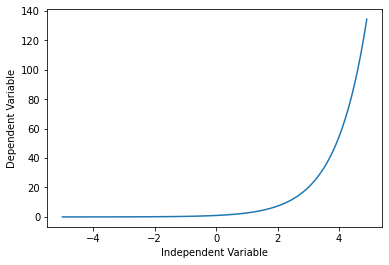

In [10]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### logarítmica

A resposta $y$ é o resultado da aplicação do mapa logarítmico da entrada $x$ à saída $y$. É uma das formas mais simples de **log()**: ou seja, $$ y = \log(x)$$

Por favor, considere que em vez de $x$, podemos usar $X$, que pode ser uma representação polinomial dos valores de $x$. Na forma geral, seria escrito como \
$$ y = \log(X)$$

C:\Users\manda\AppData\Local\Temp\ipykernel_2932\348600822.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


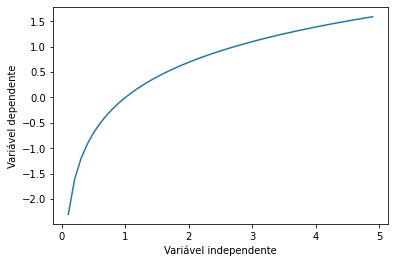

In [12]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Variável dependente')
plt.xlabel('Variável independente')
plt.show()

### Sigmoidal/Logística



$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

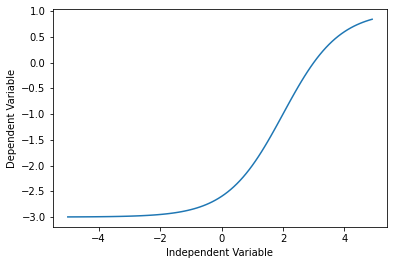

In [13]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# Exemplo de regressão não linear

Por exemplo, vamos tentar ajustar um modelo não linear aos pontos de dados correspondentes ao PIB da China de 1960 a 2014. Baixamos um conjunto de dados com duas colunas, a primeira, um ano entre 1960 e 2014, a segunda, Renda interna bruta anual correspondente da China em dólares americanos para aquele ano.

In [15]:
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Plotando o conjunto de dados

É assim que os pontos de dados se parecem. Parece uma função logística ou exponencial. O crescimento começa lento, então a partir de 2005, o crescimento é muito significativo. E, finalmente, desacelera um pouco na década de 2010.

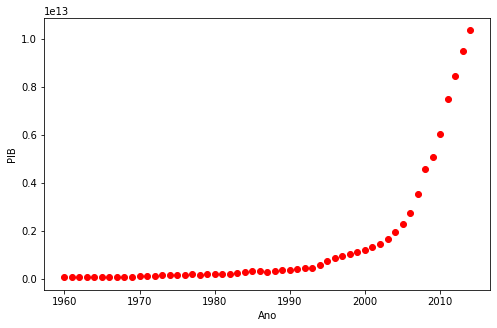

In [17]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('PIB')
plt.xlabel('Ano')
plt.show()

### Escolhendo um modelo

De uma olhada inicial no gráfico, determinamos que a função logística pode ser uma boa aproximação,
pois tem a propriedade de começar com um crescimento lento, aumentando o crescimento no meio e depois diminuindo novamente no final; conforme ilustrado abaixo:

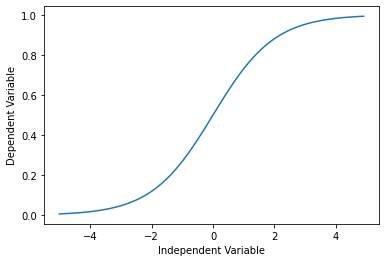

In [18]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

A fórmula da função logística é a seguinte:

$$ \hat{Y} = \frac1{1+e^{-\beta\_1(X-\beta\_2)}}$$

$\beta\_1$: Controla a inclinação da curva,

$\beta\_2$: Desliza a curva no eixo x.

### Construindo o modelo

Agora, vamos construir nosso modelo de regressão e inicializar seus parâmetros.

In [22]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return 

Vamos dar uma olhada em uma linha sigmóide de amostra que pode se encaixar com os dados

In [23]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'